# 라이브러리 설치

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# 한글 시각화 준비

In [ ]:
!pip install koreanize-matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 38.2 MB/s eta 0:00:00


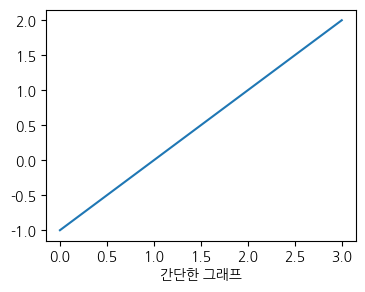

In [ ]:
import matplotlib.pyplot as plt
import koreanize_matplotlib
plt.figure(figsize=(4,3))
plt.plot([-1, 0, 1, 2])
plt.xlabel('간단한 그래프')
plt.show()

# 데이터 불러오기

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/프로젝트/파이널프로젝트/데이터 모음/전처리 1차/pp_cj2022 (1).csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9094 entries, 0 to 9093
Data columns (total 19 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   배송년월일    9094 non-null   object 
 1   년        9094 non-null   int64  
 2   월        9094 non-null   int64  
 3   일        9094 non-null   int64  
 4   요일       9094 non-null   object 
 5   공휴일      9094 non-null   int64  
 6   지역       9094 non-null   object 
 7   일하는_구    9094 non-null   object 
 8   가구/인테리어  9094 non-null   float64
 9   기타       9094 non-null   float64
 10  도서/음반    9094 non-null   float64
 11  디지털/가전   9094 non-null   float64
 12  생활/건강    9094 non-null   float64
 13  스포츠/레저   9094 non-null   float64
 14  식품       9094 non-null   float64
 15  출산/육아    9094 non-null   float64
 16  패션의류     9094 non-null   float64
 17  패션잡화     9094 non-null   float64
 18  화장품/미용   9094 non-null   float64
dtypes: float64(11), int64(4), object(4)
memory usage: 1.3+ MB


In [ ]:
df.head(2)

,배송년월일,년,월,일,요일,공휴일,지역,일하는_구,가구/인테리어,기타,도서/음반,디지털/가전,생활/건강,스포츠/레저,식품,출산/육아,패션의류,패션잡화,화장품/미용
0,2022-01-01,2022,1,1,토,1,서울특별시,강남구,0.0,212.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2022-01-01,2022,1,1,토,1,서울특별시,강동구,0.0,70.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# 구별 택배 물량 총합 구하기

In [ ]:
top_items_by_region = df.groupby(['일하는_구'])[['가구/인테리어', '기타', '도서/음반', '디지털/가전', '생활/건강', '스포츠/레저', '식품', '출산/육아', '패션의류', '패션잡화', '화장품/미용']].sum()
region_sum = top_items_by_region.sum(axis=1)
region_sum.to_frame(name='합계')

,합계
일하는_구,
강남구,12220820.0
강동구,4604727.0
강북구,2627148.0
강서구,8428150.0
관악구,4701903.0
광진구,4570976.0
구로구,4902477.0
금천구,6711993.0
노원구,4388910.0


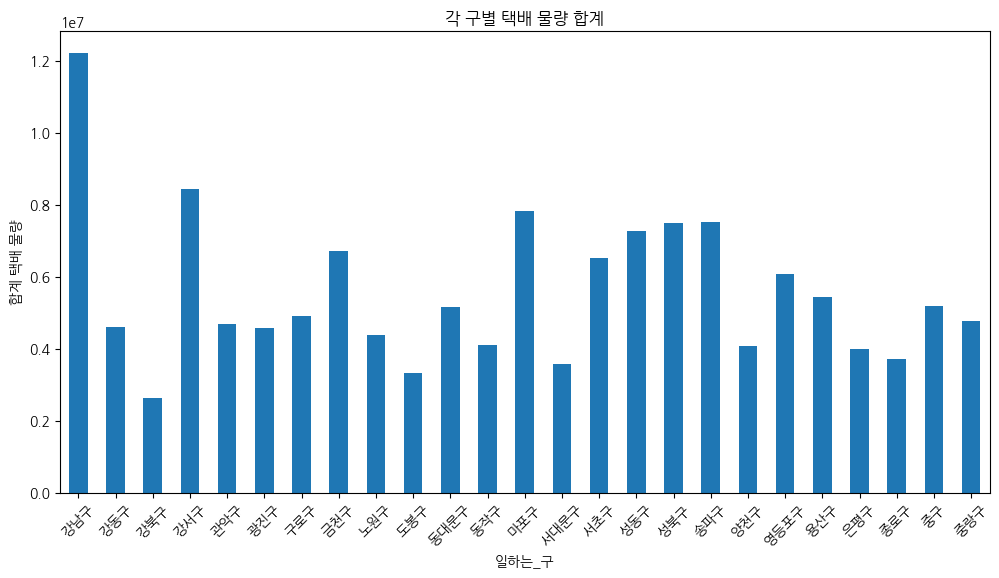

In [ ]:
# 데이터프레임을 기반으로 막대 그래프 생성
plt.figure(figsize=(12, 6))
region_sum.plot(kind='bar', legend=False)
plt.title("각 구별 택배 물량 합계")
plt.xlabel("일하는_구")
plt.ylabel("합계 택배 물량")
plt.xticks(rotation=45)
plt.show()

# 구별, 품목별 택배 물량 총합 구하기

## 가구/인테리어

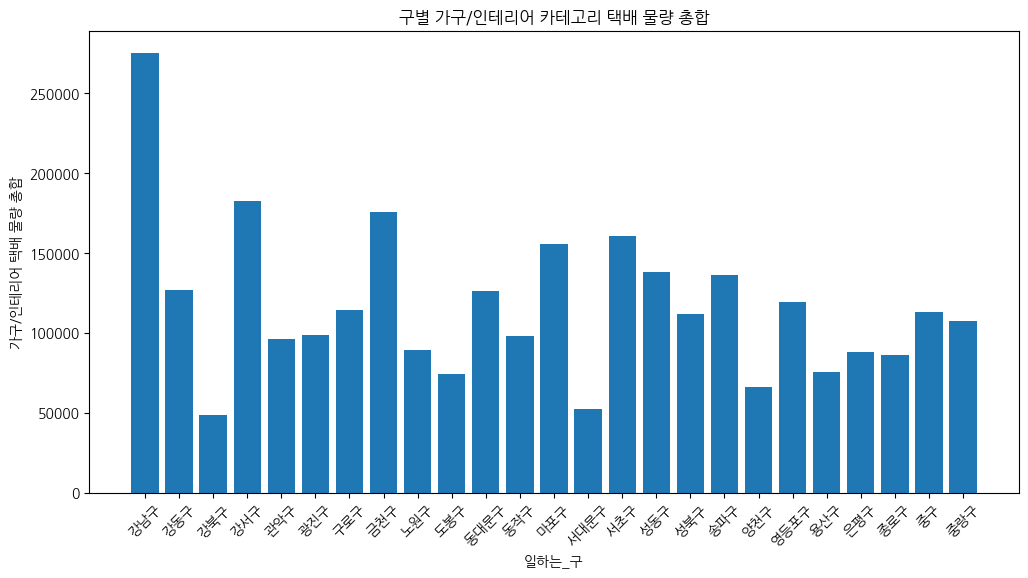

In [ ]:
# '일하는_구'와 '가구/인테리어' 열만을 선택하여 그룹화하고 평균 계산
top_items_by_region = df.groupby(['일하는_구'])['가구/인테리어'].sum()

# 시각화
plt.figure(figsize=(12, 6))
plt.bar(top_items_by_region.index, top_items_by_region)
plt.title("구별 가구/인테리어 카테고리 택배 물량 총합")
plt.xlabel("일하는_구")
plt.ylabel("가구/인테리어 택배 물량 총합")
plt.xticks(rotation=45)
plt.show()

## 도서/음반

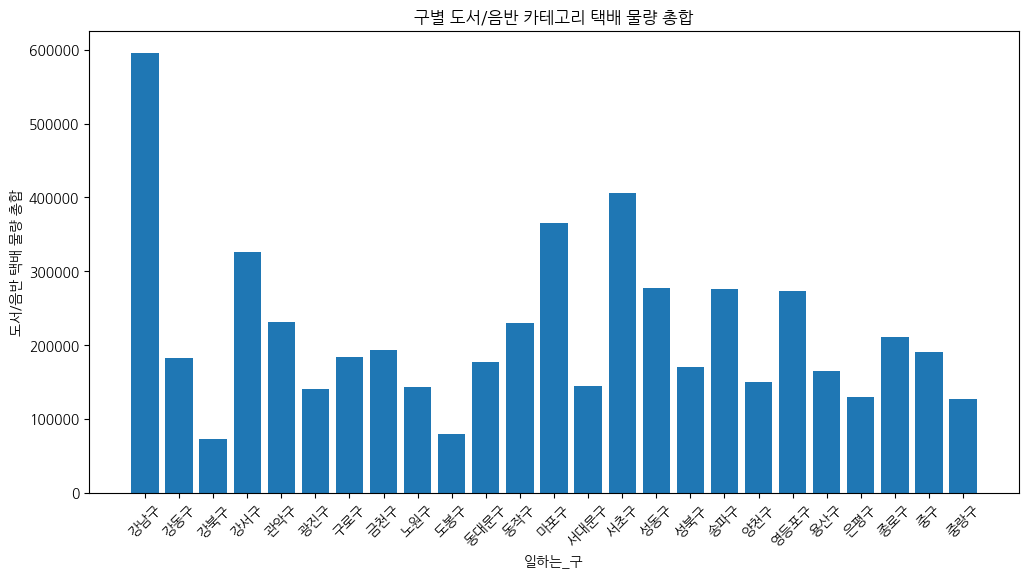

In [ ]:
top_items_by_region = df.groupby(['일하는_구'])['도서/음반'].sum()

# 시각화
plt.figure(figsize=(12, 6))
plt.bar(top_items_by_region.index, top_items_by_region)
plt.title("구별 도서/음반 카테고리 택배 물량 총합")
plt.xlabel("일하는_구")
plt.ylabel("도서/음반 택배 물량 총합")
plt.xticks(rotation=45)
plt.show()

## 디지털/가전

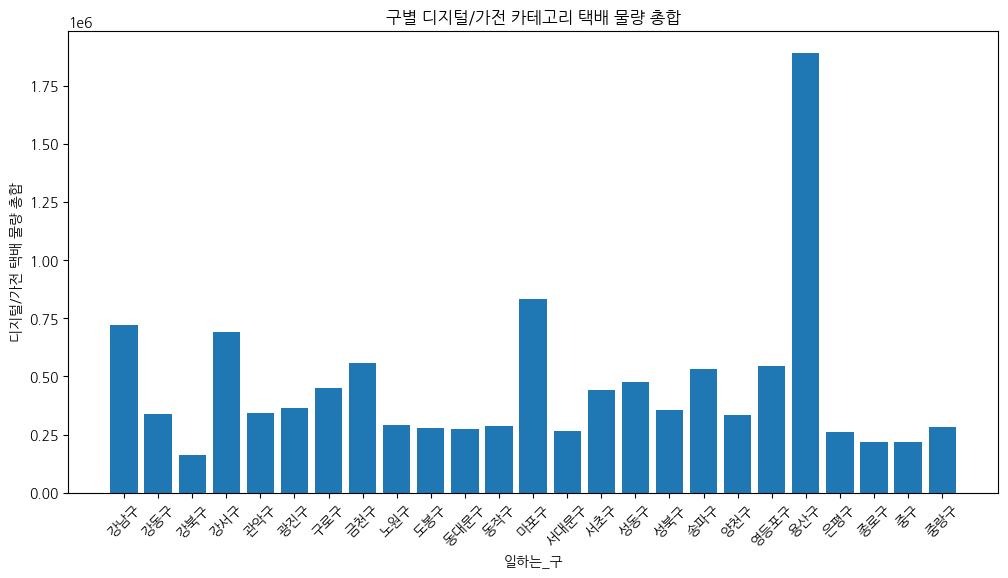

In [ ]:
top_items_by_region = df.groupby(['일하는_구'])['디지털/가전'].sum()

# 시각화
plt.figure(figsize=(12, 6))
plt.bar(top_items_by_region.index, top_items_by_region)
plt.title("구별 디지털/가전 카테고리 택배 물량 총합")
plt.xlabel("일하는_구")
plt.ylabel("디지털/가전 택배 물량 총합")
plt.xticks(rotation=45)
plt.show()

## 생활/건강

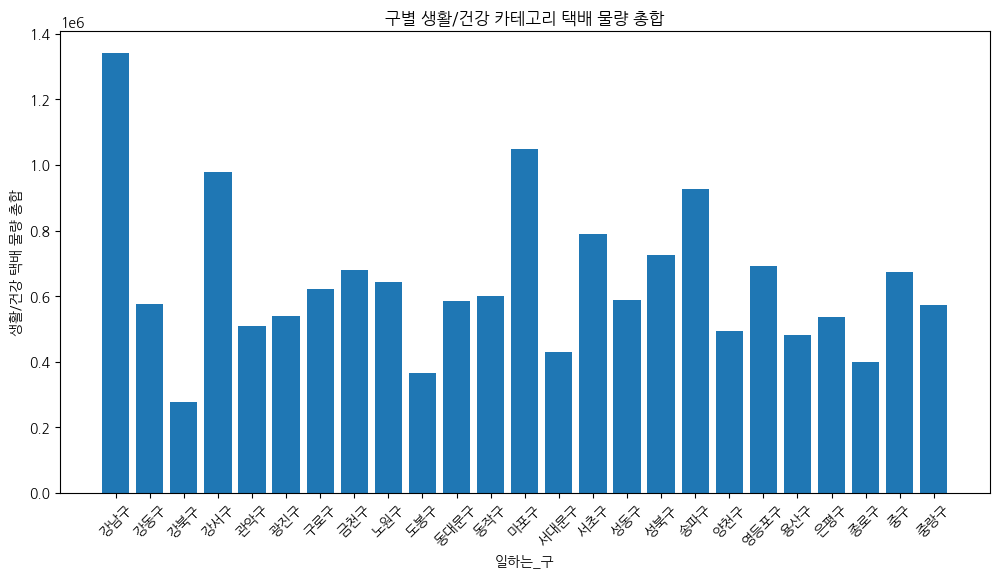

In [ ]:
top_items_by_region = df.groupby(['일하는_구'])['생활/건강'].sum()

# 시각화
plt.figure(figsize=(12, 6))
plt.bar(top_items_by_region.index, top_items_by_region)
plt.title("구별 생활/건강 카테고리 택배 물량 총합")
plt.xlabel("일하는_구")
plt.ylabel("생활/건강 택배 물량 총합")
plt.xticks(rotation=45)
plt.show()

## 식품

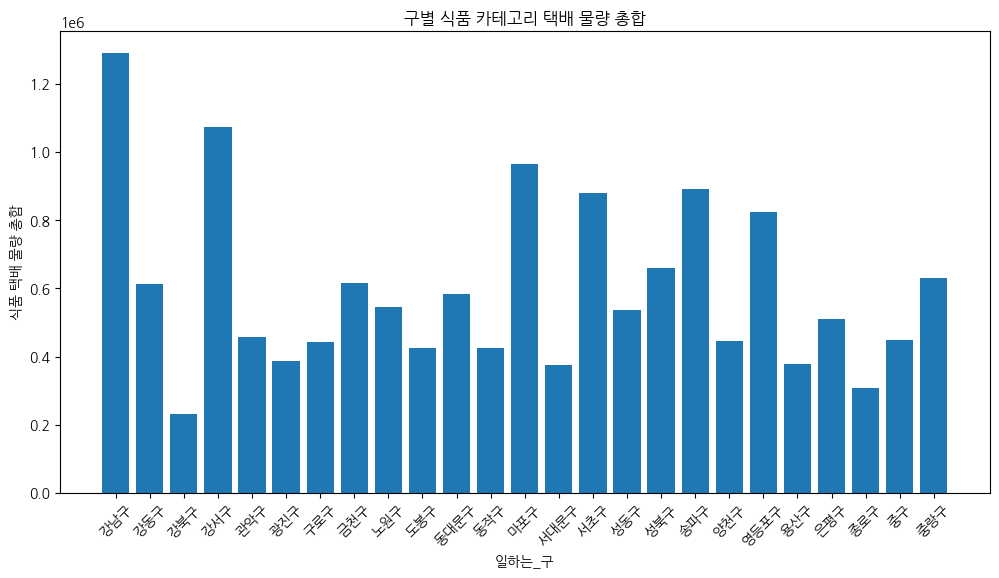

In [ ]:
top_items_by_region = df.groupby(['일하는_구'])['식품'].sum()

# 시각화
plt.figure(figsize=(12, 6))
plt.bar(top_items_by_region.index, top_items_by_region)
plt.title("구별 식품 카테고리 택배 물량 총합")
plt.xlabel("일하는_구")
plt.ylabel("식품 택배 물량 총합")
plt.xticks(rotation=45)
plt.show()

## 출산/육아

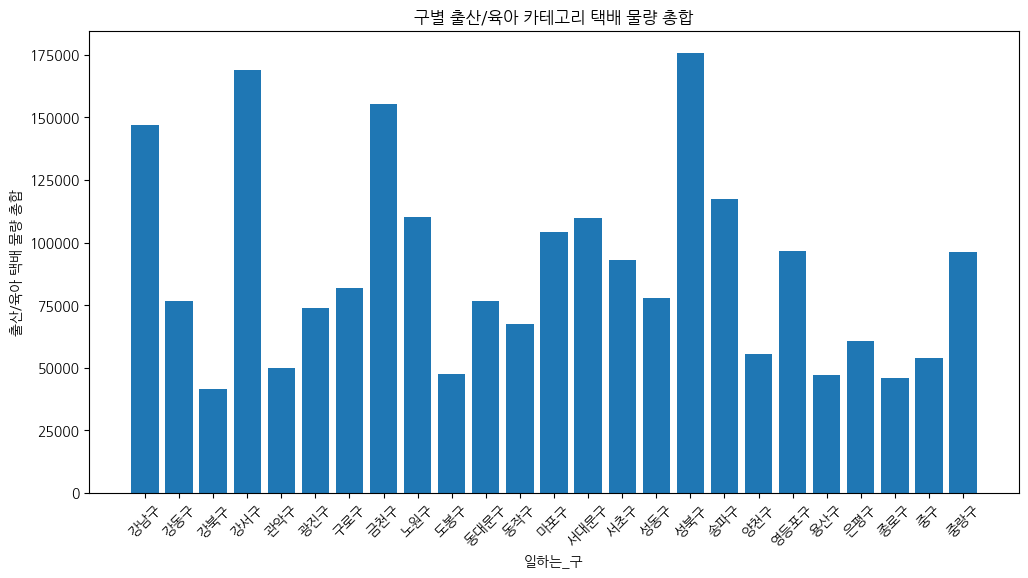

In [ ]:
top_items_by_region = df.groupby(['일하는_구'])['출산/육아'].sum()

# 시각화
plt.figure(figsize=(12, 6))
plt.bar(top_items_by_region.index, top_items_by_region)
plt.title("구별 출산/육아 카테고리 택배 물량 총합")
plt.xlabel("일하는_구")
plt.ylabel("출산/육아 택배 물량 총합")
plt.xticks(rotation=45)
plt.show()

## 패션의류

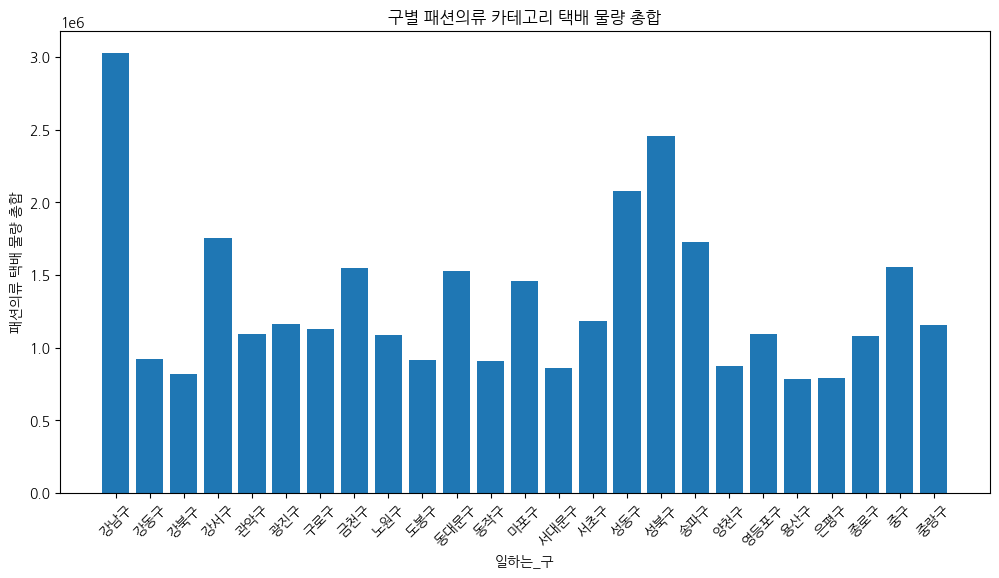

In [ ]:
top_items_by_region = df.groupby(['일하는_구'])['패션의류'].sum()

# 시각화
plt.figure(figsize=(12, 6))
plt.bar(top_items_by_region.index, top_items_by_region)
plt.title("구별 패션의류 카테고리 택배 물량 총합")
plt.xlabel("일하는_구")
plt.ylabel("패션의류 택배 물량 총합")
plt.xticks(rotation=45)
plt.show()

## 패션잡화

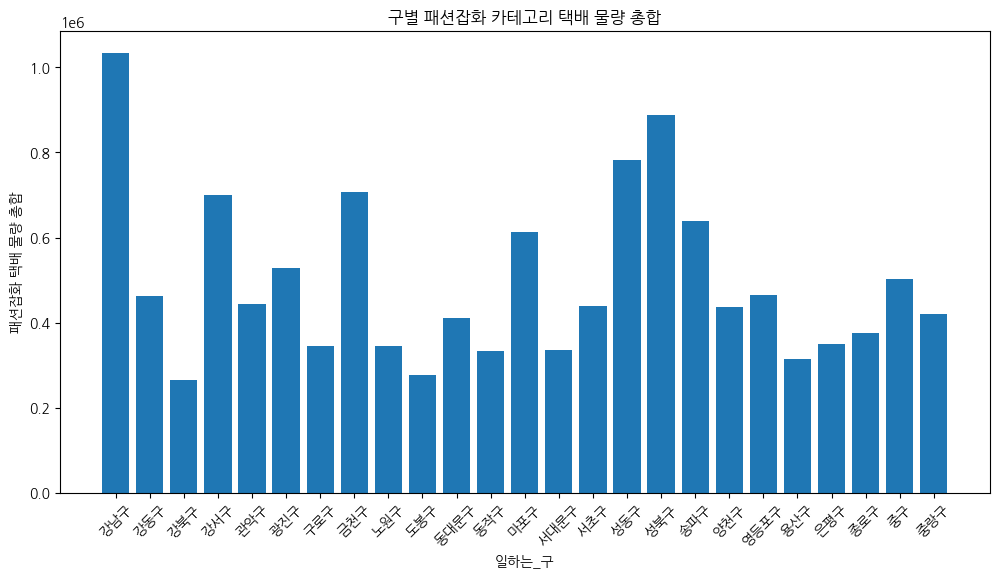

In [ ]:
top_items_by_region = df.groupby(['일하는_구'])['패션잡화'].sum()

# 시각화
plt.figure(figsize=(12, 6))
plt.bar(top_items_by_region.index, top_items_by_region)
plt.title("구별 패션잡화 카테고리 택배 물량 총합")
plt.xlabel("일하는_구")
plt.ylabel("패션잡화 택배 물량 총합")
plt.xticks(rotation=45)
plt.show()

## 화장품/미용

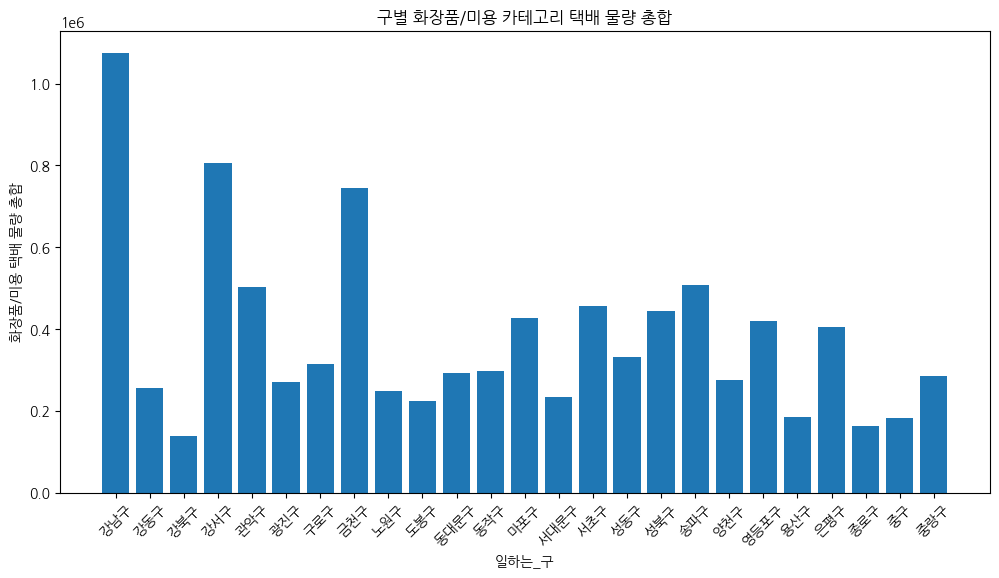

In [ ]:
top_items_by_region = df.groupby(['일하는_구'])['화장품/미용'].sum()

# 시각화
plt.figure(figsize=(12, 6))
plt.bar(top_items_by_region.index, top_items_by_region)
plt.title("구별 화장품/미용 카테고리 택배 물량 총합")
plt.xlabel("일하는_구")
plt.ylabel("화장품/미용 택배 물량 총합")
plt.xticks(rotation=45)
plt.show()